In [16]:
# data Analysis
import pandas as pd
import numpy as np
import random as rng

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


#SciKit Learn Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split,learning_curve

from xgboost import XGBClassifier

import itertools
from rfpimp import importances,plot_importances

In [2]:
from subprocess import check_output
print(check_output(["ls", "Scrapers/data"]).decode("utf8"))
data = pd.read_csv("Scrapers/data/finalout.csv")

2to1.py
edit_json_template.py
fighter_profile_template.json
fight_json
finalout.csv
json_with_other_template
move_files.py
profile_json
profile_links
results_record.json
time_bound_profiles



In [3]:
data.describe()

,BPrev,BStreak,B_Age,B_Height,B_ID,B_Weight,B__Round1_Grappling_Reversals_Landed,B__Round1_Grappling_Standups_Landed,B__Round1_Grappling_Submissions_Attempts,B__Round1_Grappling_Takedowns_Attempts,...,R__Round5_TIP_Distance Time,R__Round5_TIP_Ground Control Time,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time
count,2318.000000,2318.000000,2301.000000,2301.000000,2318.000000,2306.000000,1647.000000,1647.000000,1647.000000,1647.000000,...,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,2.391286,0.744607,31.776184,177.327249,2120.001726,73.699480,0.074681,1.103825,0.577413,3.852459,...,251.411111,33.644444,64.903704,6.855556,3.977778,4.303704,12.011111,262.740741,4.381481,303.103704
std,2.539978,1.145596,4.165267,8.807620,705.089725,15.425347,0.305691,1.537946,1.049758,5.261864,...,197.588561,75.756504,100.516057,25.786323,13.039241,12.810181,39.171198,199.940529,20.941919,224.848078
min,0.000000,0.000000,20.000000,152.000000,129.000000,52.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,29.000000,172.000000,1910.250000,61.000000,0.000000,0.000000,0.000000,0.000000,...,137.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,137.000000,0.000000,178.000000
50%,2.000000,0.000000,31.000000,177.000000,2230.000000,70.000000,0.000000,1.000000,0.000000,2.000000,...,222.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,258.500000,0.000000,296.500000
75%,4.000000,1.000000,35.000000,182.000000,2709.000000,84.000000,0.000000,2.000000,1.000000,5.000000,...,299.000000,34.000000,98.000000,0.000000,0.000000,0.000000,2.000000,300.000000,0.000000,364.000000
max,14.000000,10.000000,48.000000,213.000000,3196.000000,120.000000,3.000000,13.000000,8.000000,47.000000,...,1259.000000,633.000000,666.000000,144.000000,91.000000,62.000000,273.000000,1291.000000,200.000000,1473.000000


In [4]:
data.describe(include=['O'])

,B_HomeTown,B_Location,B_Name,Date,R_HomeTown,R_Location,R_Name,winby,winner
count,2301,2305,2318,2318,2293,2294,2318,2282,2318
unique,724,567,949,389,652,504,842,3,4
top,Rio de Janeiro Brazil,Rio de Janeiro Brazil,Kevin Lee,10/08/2018,Rio de Janeiro Brazil,Rio de Janeiro Brazil,Donald Cerrone,DEC,red
freq,46,58,11,76,65,99,14,1111,1327


### Some Notes to observe
- Red Side seems to win slightly more than blue (1372/2318 = 59.188%)
- Donald Cerrone fights on Red side more than any other fighter, with 14 fights
- Kevin Lee fights on Blue side more than any other fighter with 11
- Most Fights are won by decision
- The Most common hometown and training location for fighters is Rei De Janeiro in Brazil

In [5]:
data.head()

,BPrev,BStreak,B_Age,B_Height,B_HomeTown,B_ID,B_Location,B_Name,B_Weight,B__Round1_Grappling_Reversals_Landed,...,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winby,winner
0,0,0,38.0,193.0,Hounslow England,808,Amsterdam The Netherlands,Alistair Overeem,120.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,blue
1,0,0,36.0,172.0,"Chicago, Illinois United States",1054,"Chicago, Illinois United States",Ricardo Lamas,65.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red
2,0,0,39.0,167.0,"Isla Vista , California USA",959,"Sacramento, California USA",Urijah Faber,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KO/TKO,red
3,0,0,33.0,167.0,"San Diego, CA USA",1056,"San Diego, CA USA",Danny Martinez,56.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red
4,0,0,36.0,185.0,Southampton England,2005,Southampton England,Tom Watson,84.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red


In [6]:
data.tail()

,BPrev,BStreak,B_Age,B_Height,B_HomeTown,B_ID,B_Location,B_Name,B_Weight,B__Round1_Grappling_Reversals_Landed,...,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winby,winner
2313,7,0,34.0,172.0,"El Paso, Texas United States",1137,"Coconut Creek, Florida United States",Nik Lentz,70.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KO/TKO,blue
2314,9,1,31.0,177.0,"Milwaukee, Wisconsin United States",1069,"Milwaukee, Wisconsin United States",Anthony Pettis,70.0,3.0,...,0.0,0.0,0.0,0.0,0.0,298.0,0.0,298.0,KO/TKO,red
2315,5,3,35.0,180.0,Amazonas Brazil,2101,Rio de Janeiro Brazil,Alan Patrick,70.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KO/TKO,red
2316,1,0,37.0,170.0,"Moses Lake, Washington United States",1200,"Houston, Texas United States",Tonya Evinger,61.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KO/TKO,red
2317,0,0,23.0,190.0,"Los Angeles, California United States",3072,"Fontana, California United States",Jalin Turner,70.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KO/TKO,red


In [7]:
data.fillna(value=0,inplace=True)

In [8]:
data.tail()

,BPrev,BStreak,B_Age,B_Height,B_HomeTown,B_ID,B_Location,B_Name,B_Weight,B__Round1_Grappling_Reversals_Landed,...,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winby,winner
2313,7,0,34.0,172.0,"El Paso, Texas United States",1137,"Coconut Creek, Florida United States",Nik Lentz,70.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KO/TKO,blue
2314,9,1,31.0,177.0,"Milwaukee, Wisconsin United States",1069,"Milwaukee, Wisconsin United States",Anthony Pettis,70.0,3.0,...,0.0,0.0,0.0,0.0,0.0,298.0,0.0,298.0,KO/TKO,red
2315,5,3,35.0,180.0,Amazonas Brazil,2101,Rio de Janeiro Brazil,Alan Patrick,70.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KO/TKO,red
2316,1,0,37.0,170.0,"Moses Lake, Washington United States",1200,"Houston, Texas United States",Tonya Evinger,61.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KO/TKO,red
2317,0,0,23.0,190.0,"Los Angeles, California United States",3072,"Fontana, California United States",Jalin Turner,70.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KO/TKO,red


In [9]:
dropdata = data.drop(['B_ID','B_Name','R_ID','R_Name','winby','Date','Event_ID', 'Fight_ID','Max_round','Last_round'],axis=1)
dropdata = dropdata.drop(['B_Weight','R_Weight','B_HomeTown','R_HomeTown','B_Location','R_Location'],axis=1)
dropdata.rename(columns={'BPrev':'B__Prev',
                         'RPrev':'R__Prev',
                         'B_Age':'B__Age',
                         'B_Height':'B__Height',
                         'B_Weight':'B__Weight',
                         'R_Age':'R__Age',
                         'R_Height':'R__Height',
                         'R_Weight':'R__Weight',
                         'BStreak':'B__Streak',
                         'RStreak': 'R__Streak'},inplace=True)
dropdata.describe()

,B__Prev,B__Streak,B__Age,B__Height,B__Round1_Grappling_Reversals_Landed,B__Round1_Grappling_Standups_Landed,B__Round1_Grappling_Submissions_Attempts,B__Round1_Grappling_Takedowns_Attempts,B__Round1_Grappling_Takedowns_Landed,B__Round1_Strikes_Body Significant Strikes_Attempts,...,R__Round5_TIP_Distance Time,R__Round5_TIP_Ground Control Time,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time
count,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,...,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000
mean,2.391286,0.744607,31.543141,176.026747,0.053063,0.784297,0.410267,2.737274,1.177739,10.815358,...,29.284297,3.918896,7.559965,0.798533,0.463330,0.501294,1.399051,30.603969,0.510354,35.305436
std,2.539978,1.145596,4.957445,17.493625,0.259871,1.389608,0.922747,4.766856,2.192778,15.186241,...,105.072644,27.979205,40.083680,9.057408,4.622587,4.578076,13.892178,108.390717,7.272762,123.807764
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,29.000000,172.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,31.000000,177.000000,0.000000,0.000000,0.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,1.000000,35.000000,182.000000,0.000000,1.000000,0.000000,4.000000,1.750000,16.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,14.000000,10.000000,48.000000,213.000000,3.000000,13.000000,8.000000,47.000000,20.000000,124.000000,...,1259.000000,633.000000,666.000000,144.000000,91.000000,62.000000,273.000000,1291.000000,200.000000,1473.000000


In [10]:
dropdata.describe(include=['O'])

,winner
count,2318
unique,4
top,red
freq,1327


In [11]:
objecttypes = list(dropdata.select_dtypes(include=['O']).columns)
for col in objecttypes:
    dropdata[col] = dropdata[col].astype('category')

In [12]:
cat_columns = dropdata.select_dtypes(['category']).columns
dropdata[cat_columns] = dropdata[cat_columns].apply(lambda x: x.cat.codes)
dropdata.info()
dropdata.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Columns: 878 entries, B__Prev to winner
dtypes: float64(874), int64(3), int8(1)
memory usage: 15.5 MB


,B__Prev,B__Streak,B__Age,B__Height,B__Round1_Grappling_Reversals_Landed,B__Round1_Grappling_Standups_Landed,B__Round1_Grappling_Submissions_Attempts,B__Round1_Grappling_Takedowns_Attempts,B__Round1_Grappling_Takedowns_Landed,B__Round1_Strikes_Body Significant Strikes_Attempts,...,R__Round5_TIP_Ground Control Time,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winner
2313,7,0,34.0,172.0,0.0,3.0,3.0,24.0,7.0,45.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2314,9,1,31.0,177.0,3.0,6.0,1.0,2.0,0.0,66.0,...,0.0,0.0,0.0,0.0,0.0,0.0,298.0,0.0,298.0,3
2315,5,3,35.0,180.0,0.0,1.0,1.0,25.0,12.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2316,1,0,37.0,170.0,0.0,0.0,0.0,3.0,1.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2317,0,0,23.0,190.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [13]:
dropdata.head()

,B__Prev,B__Streak,B__Age,B__Height,B__Round1_Grappling_Reversals_Landed,B__Round1_Grappling_Standups_Landed,B__Round1_Grappling_Submissions_Attempts,B__Round1_Grappling_Takedowns_Attempts,B__Round1_Grappling_Takedowns_Landed,B__Round1_Strikes_Body Significant Strikes_Attempts,...,R__Round5_TIP_Ground Control Time,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winner
0,0,0,38.0,193.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0,0,36.0,172.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2,0,0,39.0,167.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,0,0,33.0,167.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0,0,36.0,185.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


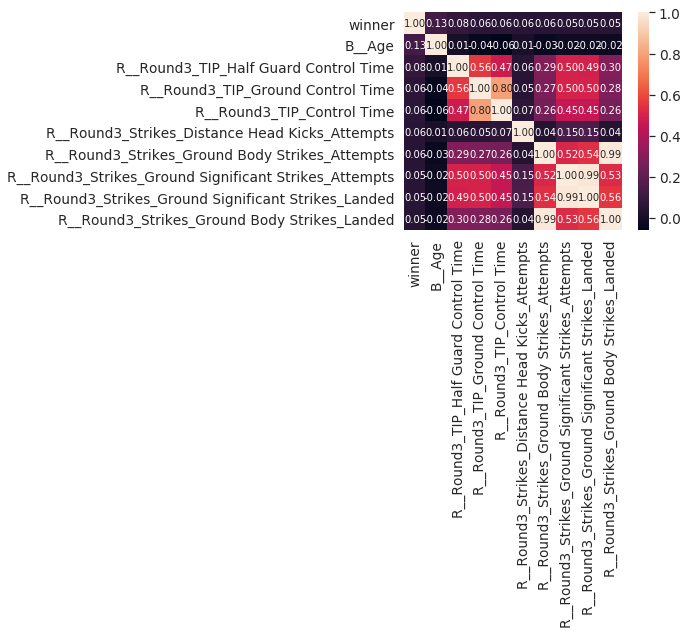

In [14]:
k = 10 #number of variables for heatmap
corrmat = dropdata.corr()
cols = corrmat.nlargest(k, 'winner')['winner'].index
cm = np.corrcoef(dropdata[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [15]:
def plot_cm(cm,title): 
    plt.figure()
    labels = ['Blue','D','N','Red']
    plt.imshow(cm, interpolation='nearest',cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    
    fmt = 'd'
    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()

In [50]:
def ranfor(X_train,Y_train,X_test,Y_test,results):
    randomfor = RandomForestClassifier(max_features="sqrt",
                                       n_estimators = 700,
                                       max_depth = None,
                                       n_jobs=-1
                                      )
    randomfor.fit(X_train,Y_train)
    Y_pred = randomfor.predict(X_test)
    results['Random Forests'] = [accuracy_score(Y_test,Y_pred),confusion_matrix(Y_test,Y_pred)]
    return

def svm(X_train,Y_train,X_test,Y_test,results):
    svc = SVC()
    svc.fit(X_train, Y_train)
    Y_pred = svc.predict(X_test)
    results['SVM'] = [accuracy_score(Y_test,Y_pred),confusion_matrix(Y_test,Y_pred)]
    return

def xgb(X_train,Y_train,X_test,Y_test,results):
    xgbc = XGBClassifier(early_stopping_rounds=2)
    xgbc.fit(X_train, Y_train)
    Y_pred = xgbc.predict(X_test)
    results['xgb'] = [accuracy_score(Y_test,Y_pred),confusion_matrix(Y_test,Y_pred)]
    return

def full_nn(X_train,Y_train,X_test,Y_test,results):
    nn = MLPClassifier(hidden_layer_sizes=(500,300,100,))
    nn.fit(X_train,Y_train)
    Y_pred = nn.predict(X_test)
    results['NN'] = [accuracy_score(Y_test,Y_pred),confusion_matrix(Y_test,Y_pred)]
    return

def run_all(df):
    X_all = df.drop(['winner'], axis=1)
    y_all = df['winner']
    X_train, X_test, Y_train, Y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=0)
    
    results = dict()
    
    ranfor(X_train,Y_train,X_test,Y_test,results)
    svm(X_train,Y_train,X_test,Y_test,results)
    xgb(X_train,Y_train,X_test,Y_test,results)
    full_nn(X_train,Y_train,X_test,Y_test,results)
    
    return results

In [51]:
def pprint_results(results):
    for model in results.keys():
        print(f'Accuracy of {model} = {results[model][0]}')
        plot_cm(results[model][1],f"{model} CM")

In [52]:
def draw_learning_curve(model,X,Y):
    train_sizes,train_scores,test_scores = learning_curve(model,X,Y,cv=5,train_sizes=[500,1000,1500,1852])
    train_scores_mean = np.mean(train_scores,axis=1)
    test_scores_mean = np.mean(test_scores,axis=1)
    plt.grid()
    plt.xlabel("Training_examples")
    plt.ylabel("Scores")
    plt.plot(train_sizes,train_scores_mean,label="Training_scores")
    plt.plot(train_sizes,test_scores_mean,label="Test Scores")
    plt.legend(loc="best")
    plt.title("Learning Curve")

In [53]:
def get_feature_imp(model,X,Y, return_n_top_fetures = 10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
    model.fit(X_train,Y_train)
    imp = importances(model, X_test, Y_test)
    return imp.head(n=return_n_top_fetures)

In [54]:
results_stock = run_all(dropdata)

/home/hitkul/anaconda3/envs/ufc/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of Random Forests = 0.5711206896551724
Accuracy of SVM = 0.5732758620689655
Accuracy of xgb = 0.6120689655172413
Accuracy of NN = 0.5172413793103449


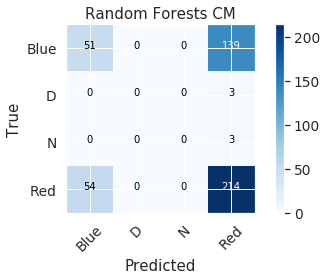

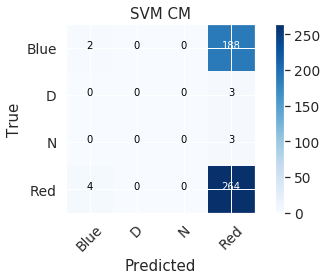

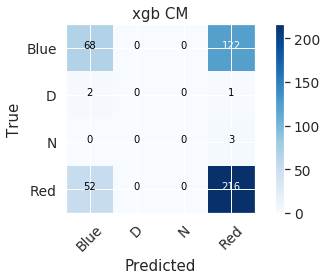

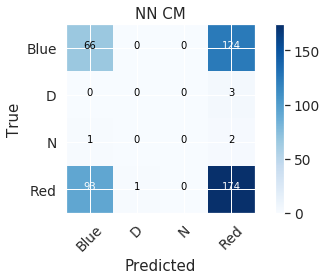

In [55]:
pprint_results(results_stock)

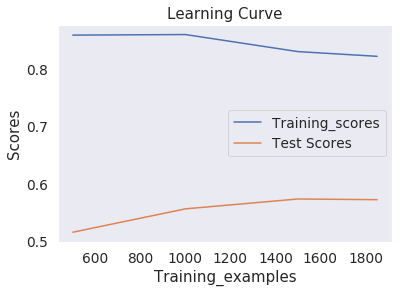

In [56]:
draw_learning_curve(XGBClassifier(early_stopping_rounds=2),dropdata.drop(['winner'], axis=1),dropdata['winner'])

In [57]:
top_10_stock_features = get_feature_imp(XGBClassifier(),dropdata.drop(['winner'], axis=1),dropdata['winner'])

/home/hitkul/anaconda3/envs/ufc/lib/python3.6/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


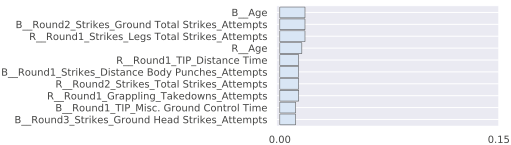

In [58]:
plot_importances(top_10_stock_features)

In [59]:
top_10_stock_features

,Importance
Feature,
B__Age,0.017241
B__Round2_Strikes_Ground Total Strikes_Attempts,0.017241
R__Round1_Strikes_Legs Total Strikes_Attempts,0.017241
R__Age,0.015086
R__Round1_TIP_Distance Time,0.012931
B__Round1_Strikes_Distance Body Punches_Attempts,0.012931
R__Round2_Strikes_Total Strikes_Attempts,0.012931
R__Round1_Grappling_Takedowns_Attempts,0.012931
B__Round1_TIP_Misc. Ground Control Time,0.010776


## Dropping round 4 and 5

In [60]:
r4 = [col for col in dropdata.columns if "Round4" in col]
r5 = [col for col in dropdata.columns if "Round5" in col]

In [61]:
threerounds_data = dropdata.drop(r4+r5,axis = 1)

In [62]:
results_threeround = run_all(threerounds_data)

/home/hitkul/anaconda3/envs/ufc/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of Random Forests = 0.5775862068965517
Accuracy of SVM = 0.5732758620689655
Accuracy of xgb = 0.6163793103448276
Accuracy of NN = 0.5


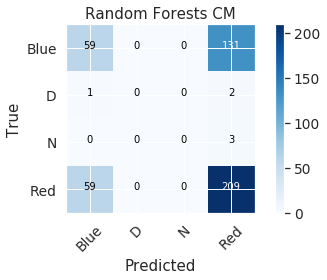

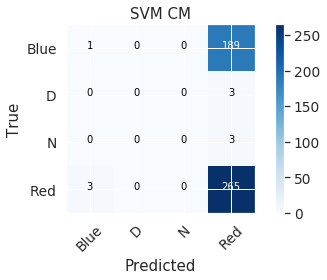

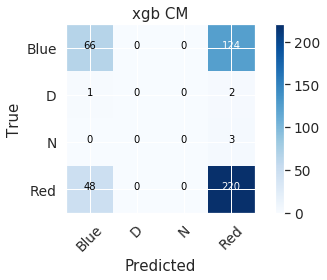

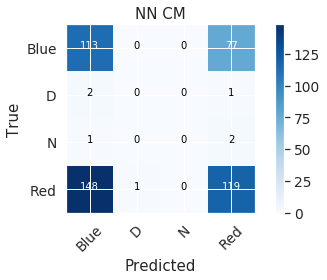

In [63]:
pprint_results(results_threeround)

In [64]:
top_10_threeround_features = get_feature_imp(XGBClassifier(),threerounds_data.drop(['winner'], axis=1),threerounds_data['winner'])

/home/hitkul/anaconda3/envs/ufc/lib/python3.6/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


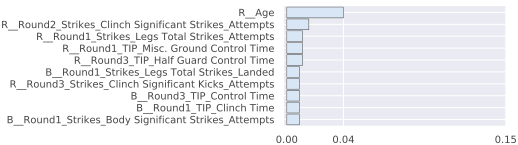

In [65]:
plot_importances(top_10_threeround_features)

## Only using top 10 features

In [66]:
top_10_f = top_10_stock_features.index.values

In [67]:
top_10_f = np.append(top_10_f,'winner')

In [68]:
col_to_drop = np.setdiff1d(dropdata.columns,top_10_f)

In [69]:
top_10_data = dropdata.drop(columns=col_to_drop,axis=1)

In [70]:
top_10_data.tail()

,B__Age,B__Round1_Strikes_Distance Body Punches_Attempts,B__Round1_TIP_Misc. Ground Control Time,B__Round2_Strikes_Ground Total Strikes_Attempts,B__Round3_Strikes_Ground Head Strikes_Attempts,R__Age,R__Round1_Grappling_Takedowns_Attempts,R__Round1_Strikes_Legs Total Strikes_Attempts,R__Round1_TIP_Distance Time,R__Round2_Strikes_Total Strikes_Attempts,winner
2313,34.0,0.0,3.0,100.0,1.0,39.0,13.0,5.0,974.0,77.0,0
2314,31.0,0.0,6.0,67.0,0.0,34.0,4.0,52.0,1745.0,402.0,3
2315,35.0,1.0,16.0,131.0,10.0,35.0,10.0,31.0,790.0,352.0,3
2316,37.0,0.0,0.0,0.0,0.0,23.0,0.0,2.0,56.0,52.0,3
2317,23.0,0.0,0.0,0.0,0.0,26.0,6.0,40.0,900.0,122.0,3


In [71]:
resuts_top10 = run_all(top_10_data)

/home/hitkul/anaconda3/envs/ufc/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of Random Forests = 0.5689655172413793
Accuracy of SVM = 0.5797413793103449
Accuracy of xgb = 0.5926724137931034
Accuracy of NN = 0.5431034482758621


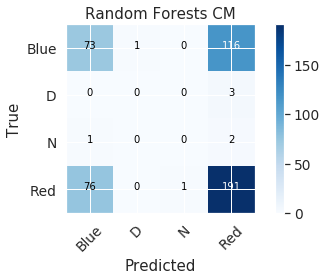

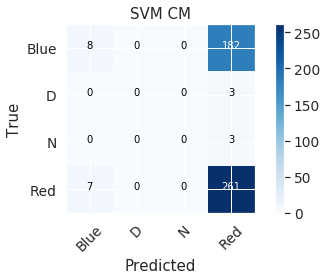

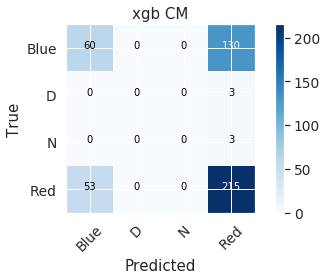

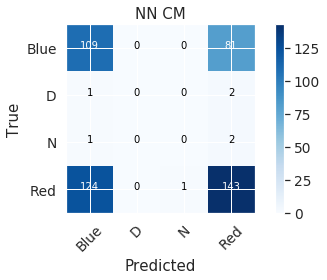

In [72]:
pprint_results(resuts_top10)

## Drop rounds in itself

In [73]:
blue_cols = [col for col in dropdata.columns if 'B__' in col]
red_cols = [col for col in dropdata.columns if 'R__' in col]

In [74]:
b_feats = list(set([x[10:] for x in blue_cols if "Round" in x]))
r_feats = list(set([x[10:] for x in red_cols if "Round" in x]))

In [75]:
fight_data = dropdata.copy()

In [76]:
def make_columns(b_feats,cols,color='B__'):
    for x in b_feats:
        fight_data.loc[:,f'{color}{x}'] = 0
        for y in cols:
            if x in y and y[:3]==color:
                fight_data[f'{color}{x}'] += fight_data[y]
                fight_data.drop(y,axis=1,inplace=True)

In [77]:
make_columns(b_feats,blue_cols)
make_columns(r_feats,red_cols,color='R__')

In [78]:
fight_data.tail()

,B__Prev,B__Streak,B__Age,B__Height,R__Prev,R__Age,R__Height,winner,B__Strikes_Legs Significant Strikes_Landed,B__Strikes_Ground Significant Punches_Landed,...,R__TIP_Ground Time,R__Strikes_Distance Body Punches_Attempts,R__Strikes_Ground Head Strikes_Attempts,R__Strikes_Clinch Body Strikes_Attempts,R__Strikes_Kicks_Attempts,R__Strikes_Body Significant Strikes_Attempts,R__Strikes_Distance Head Strikes_Attempts,R__TIP_Mount Control Time,R__TIP_Distance Time,R__Strikes_Ground Head Strikes_Landed
2313,7,0,34.0,172.0,5,39.0,172.0,0,42.0,0.0,...,626.0,14.0,20.0,11.0,0.0,45.0,143.0,337.0,2081.0,13.0
2314,9,1,31.0,177.0,9,34.0,180.0,3,43.0,1.0,...,1689.0,2.0,65.0,1.0,40.0,140.0,786.0,229.0,4148.0,52.0
2315,5,3,35.0,180.0,6,35.0,175.0,3,15.0,0.0,...,1974.0,0.0,107.0,38.0,0.0,119.0,403.0,263.0,2024.0,72.0
2316,1,0,37.0,170.0,1,23.0,167.0,3,10.0,0.0,...,115.0,0.0,24.0,8.0,0.0,10.0,22.0,27.0,89.0,12.0
2317,0,0,23.0,190.0,8,26.0,180.0,3,0.0,0.0,...,1003.0,0.0,36.0,6.0,0.0,48.0,230.0,194.0,1428.0,20.0


In [79]:
results_fightdata = run_all(fight_data)

/home/hitkul/anaconda3/envs/ufc/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of Random Forests = 0.5797413793103449
Accuracy of SVM = 0.5689655172413793
Accuracy of xgb = 0.6120689655172413
Accuracy of NN = 0.5538793103448276


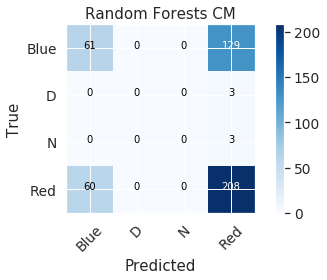

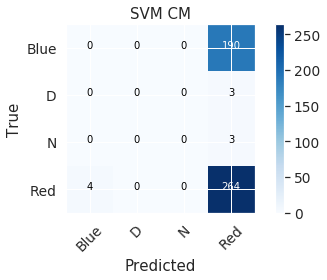

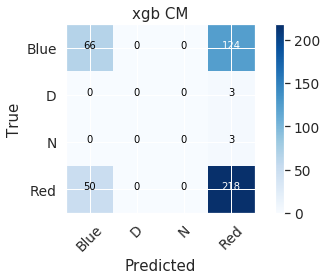

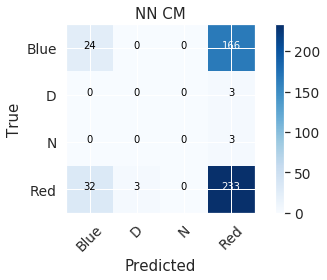

In [80]:
pprint_results(results_fightdata)

In [81]:
top_10_fight_features = get_feature_imp(XGBClassifier(),fight_data.drop(['winner'], axis=1),fight_data['winner'])

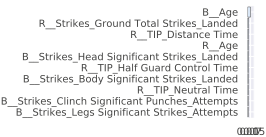

In [82]:
plot_importances(top_10_fight_features)

## Normalize feature with N_prev_fights Round data

In [83]:
norm_prev_data = dropdata.copy()

In [84]:
norm_prev_data['B__Prev']= norm_prev_data['B__Prev']+1
norm_prev_data['R__Prev']= norm_prev_data['R__Prev']+1

In [85]:
def norm_columns(cols,color='B__'):
    for x in cols:
        if "Round" in x:
            norm_prev_data[x] = norm_prev_data[x]/norm_prev_data[f'{color}Prev']
    norm_prev_data.drop([f'{color}Prev'],axis=1,inplace=True)

In [86]:
norm_columns(blue_cols)
norm_columns(red_cols,color='R__')

In [87]:
norm_prev_data.tail()

,B__Streak,B__Age,B__Height,B__Round1_Grappling_Reversals_Landed,B__Round1_Grappling_Standups_Landed,B__Round1_Grappling_Submissions_Attempts,B__Round1_Grappling_Takedowns_Attempts,B__Round1_Grappling_Takedowns_Landed,B__Round1_Strikes_Body Significant Strikes_Attempts,B__Round1_Strikes_Body Significant Strikes_Landed,...,R__Round5_TIP_Ground Control Time,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winner
2313,0,34.0,172.0,0.0,0.375000,0.375000,3.000000,0.875,5.625000,4.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2314,1,31.0,177.0,0.3,0.600000,0.100000,0.200000,0.000,6.600000,4.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,29.8,0.0,29.8,3
2315,3,35.0,180.0,0.0,0.166667,0.166667,4.166667,2.000,4.166667,2.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2316,0,37.0,170.0,0.0,0.000000,0.000000,1.500000,0.500,5.000000,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2317,0,23.0,190.0,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [88]:
results_norm_prev = run_all(norm_prev_data)

/home/hitkul/anaconda3/envs/ufc/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of Random Forests = 0.5711206896551724
Accuracy of SVM = 0.5668103448275862
Accuracy of xgb = 0.5991379310344828
Accuracy of NN = 0.5237068965517241


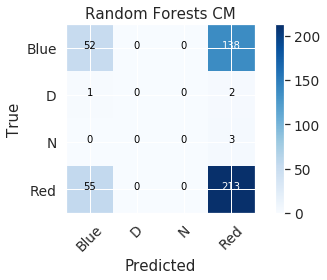

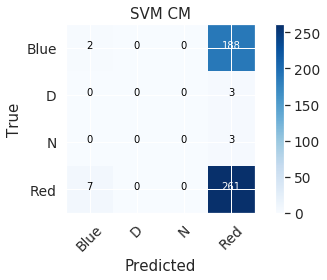

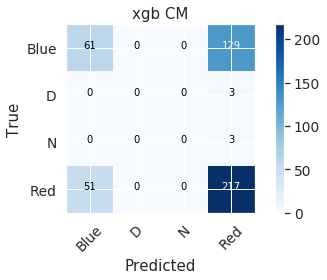

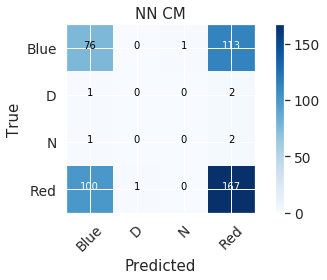

In [89]:
pprint_results(results_norm_prev)

## Normalize feature with N_prev_fights fight data

In [90]:
fight_data.tail()

,B__Prev,B__Streak,B__Age,B__Height,R__Prev,R__Age,R__Height,winner,B__Strikes_Legs Significant Strikes_Landed,B__Strikes_Ground Significant Punches_Landed,...,R__TIP_Ground Time,R__Strikes_Distance Body Punches_Attempts,R__Strikes_Ground Head Strikes_Attempts,R__Strikes_Clinch Body Strikes_Attempts,R__Strikes_Kicks_Attempts,R__Strikes_Body Significant Strikes_Attempts,R__Strikes_Distance Head Strikes_Attempts,R__TIP_Mount Control Time,R__TIP_Distance Time,R__Strikes_Ground Head Strikes_Landed
2313,7,0,34.0,172.0,5,39.0,172.0,0,42.0,0.0,...,626.0,14.0,20.0,11.0,0.0,45.0,143.0,337.0,2081.0,13.0
2314,9,1,31.0,177.0,9,34.0,180.0,3,43.0,1.0,...,1689.0,2.0,65.0,1.0,40.0,140.0,786.0,229.0,4148.0,52.0
2315,5,3,35.0,180.0,6,35.0,175.0,3,15.0,0.0,...,1974.0,0.0,107.0,38.0,0.0,119.0,403.0,263.0,2024.0,72.0
2316,1,0,37.0,170.0,1,23.0,167.0,3,10.0,0.0,...,115.0,0.0,24.0,8.0,0.0,10.0,22.0,27.0,89.0,12.0
2317,0,0,23.0,190.0,8,26.0,180.0,3,0.0,0.0,...,1003.0,0.0,36.0,6.0,0.0,48.0,230.0,194.0,1428.0,20.0


In [91]:
fight_data_prev_norm = fight_data.copy()

In [92]:
fight_data_prev_norm["B__Prev"] = fight_data_prev_norm["B__Prev"]+1
fight_data_prev_norm["R__Prev"] = fight_data_prev_norm["R__Prev"]+1

In [93]:
def norm_columns_fight(fet_cols):
    for x in fight_data_prev_norm.columns:
        if x[3:] in fet_cols:
            if x[:3] == 'R__':
                fight_data_prev_norm[x] = fight_data_prev_norm[x]/fight_data_prev_norm['R__Prev']
            elif x[:3] == 'B__':
                fight_data_prev_norm[x] = fight_data_prev_norm[x]/fight_data_prev_norm['B__Prev']
    fight_data_prev_norm.drop(['R__Prev','B__Prev'],axis=1,inplace=True)

In [94]:
norm_columns_fight(b_feats)

In [95]:
fight_data_prev_norm.tail()

,B__Streak,B__Age,B__Height,R__Age,R__Height,winner,B__Strikes_Legs Significant Strikes_Landed,B__Strikes_Ground Significant Punches_Landed,B__TIP_Standing Time,B__Strikes_Punches_Attempts,...,R__TIP_Ground Time,R__Strikes_Distance Body Punches_Attempts,R__Strikes_Ground Head Strikes_Attempts,R__Strikes_Clinch Body Strikes_Attempts,R__Strikes_Kicks_Attempts,R__Strikes_Body Significant Strikes_Attempts,R__Strikes_Distance Head Strikes_Attempts,R__TIP_Mount Control Time,R__TIP_Distance Time,R__Strikes_Ground Head Strikes_Landed
2313,0,34.0,172.0,39.0,172.0,0,5.25,0.0,357.75,0.000000,...,104.333333,2.333333,3.333333,1.833333,0.0,7.500000,23.833333,56.166667,346.833333,2.166667
2314,1,31.0,177.0,34.0,180.0,3,4.30,0.1,521.00,5.500000,...,168.900000,0.200000,6.500000,0.100000,4.0,14.000000,78.600000,22.900000,414.800000,5.200000
2315,3,35.0,180.0,35.0,175.0,3,2.50,0.0,240.50,20.333333,...,282.000000,0.000000,15.285714,5.428571,0.0,17.000000,57.571429,37.571429,289.142857,10.285714
2316,0,37.0,170.0,23.0,167.0,3,5.00,0.0,358.00,0.000000,...,57.500000,0.000000,12.000000,4.000000,0.0,5.000000,11.000000,13.500000,44.500000,6.000000
2317,0,23.0,190.0,26.0,180.0,3,0.00,0.0,0.00,0.000000,...,111.444444,0.000000,4.000000,0.666667,0.0,5.333333,25.555556,21.555556,158.666667,2.222222


In [96]:
results_norm_prev_fight = run_all(fight_data_prev_norm)

/home/hitkul/anaconda3/envs/ufc/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of Random Forests = 0.5732758620689655
Accuracy of SVM = 0.5625
Accuracy of xgb = 0.6012931034482759
Accuracy of NN = 0.5754310344827587


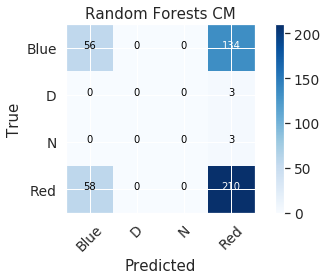

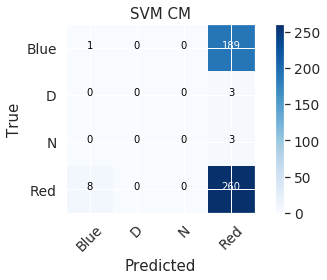

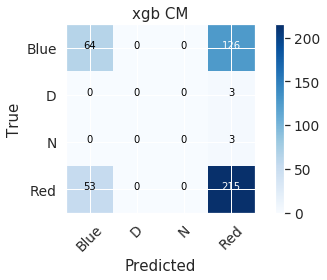

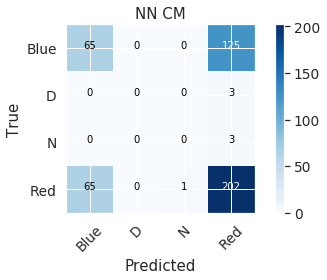

In [97]:
pprint_results(results_norm_prev_fight)

## Only keeping Strike, Grappel and TIP

In [98]:
main_move_data = fight_data.copy()

In [99]:
main_move_data.tail()

,B__Prev,B__Streak,B__Age,B__Height,R__Prev,R__Age,R__Height,winner,B__Strikes_Legs Significant Strikes_Landed,B__Strikes_Ground Significant Punches_Landed,...,R__TIP_Ground Time,R__Strikes_Distance Body Punches_Attempts,R__Strikes_Ground Head Strikes_Attempts,R__Strikes_Clinch Body Strikes_Attempts,R__Strikes_Kicks_Attempts,R__Strikes_Body Significant Strikes_Attempts,R__Strikes_Distance Head Strikes_Attempts,R__TIP_Mount Control Time,R__TIP_Distance Time,R__Strikes_Ground Head Strikes_Landed
2313,7,0,34.0,172.0,5,39.0,172.0,0,42.0,0.0,...,626.0,14.0,20.0,11.0,0.0,45.0,143.0,337.0,2081.0,13.0
2314,9,1,31.0,177.0,9,34.0,180.0,3,43.0,1.0,...,1689.0,2.0,65.0,1.0,40.0,140.0,786.0,229.0,4148.0,52.0
2315,5,3,35.0,180.0,6,35.0,175.0,3,15.0,0.0,...,1974.0,0.0,107.0,38.0,0.0,119.0,403.0,263.0,2024.0,72.0
2316,1,0,37.0,170.0,1,23.0,167.0,3,10.0,0.0,...,115.0,0.0,24.0,8.0,0.0,10.0,22.0,27.0,89.0,12.0
2317,0,0,23.0,190.0,8,26.0,180.0,3,0.0,0.0,...,1003.0,0.0,36.0,6.0,0.0,48.0,230.0,194.0,1428.0,20.0


In [100]:
def make_main_move_data():
    main_move_data['R__STRIKES'] = 0
    main_move_data['R__Tip'] = 0
    main_move_data['R__GRAPPLING'] = 0
    main_move_data['B__STRIKES'] = 0
    main_move_data['B__Tip'] = 0
    main_move_data['B__GRAPPLING'] = 0
    
    for x in main_move_data.columns:
        if "Strikes" in x:
            if x[:3] == "R__":
                main_move_data['R__STRIKES'] = main_move_data['R__STRIKES']+main_move_data[x]
                main_move_data.drop([x],axis=1,inplace=True)
            elif x[:3]=="B__":
                main_move_data['B__STRIKES'] = main_move_data['B__STRIKES']+main_move_data[x]
                main_move_data.drop([x],axis=1,inplace=True)
        elif "TIP" in x:
            if x[:3] == "R__":
                main_move_data['R__Tip'] = main_move_data['R__Tip']+main_move_data[x]
                main_move_data.drop([x],axis=1,inplace=True)
            elif x[:3]=="B__":
                main_move_data['B__Tip'] = main_move_data['B__Tip']+main_move_data[x]
                main_move_data.drop([x],axis=1,inplace=True)
        elif "Grappling" in x:
            if x[:3] == "R__":
                main_move_data['R__GRAPPLING'] = main_move_data['R__GRAPPLING']+main_move_data[x]
                main_move_data.drop([x],axis=1,inplace=True)
            elif x[:3]=="B__":
                main_move_data['B__GRAPPLING'] = main_move_data['B__GRAPPLING']+main_move_data[x]
                main_move_data.drop([x],axis=1,inplace=True)

In [101]:
make_main_move_data()

In [102]:
main_move_data.drop(['B__Streak'],axis=1,inplace=True)

In [103]:
main_move_data.tail()

,B__Prev,B__Age,B__Height,R__Prev,R__Age,R__Height,winner,R__STRIKES,R__Tip,R__GRAPPLING,B__STRIKES,B__Tip,B__GRAPPLING
2313,7,34.0,172.0,5,39.0,172.0,0,2611.0,9516.0,64.0,6600.0,12518.0,76.0
2314,9,31.0,177.0,9,34.0,180.0,3,11728.0,16221.0,32.0,9349.0,17913.0,43.0
2315,5,35.0,180.0,6,35.0,175.0,3,9078.0,15633.0,67.0,4237.0,12574.0,72.0
2316,1,37.0,170.0,1,23.0,167.0,3,701.0,1310.0,2.0,725.0,2126.0,5.0
2317,0,23.0,190.0,8,26.0,180.0,3,3876.0,8996.0,28.0,0.0,0.0,0.0


In [104]:
results_main_move_data = run_all(main_move_data)

/home/hitkul/anaconda3/envs/ufc/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of Random Forests = 0.5646551724137931
Accuracy of SVM = 0.5646551724137931
Accuracy of xgb = 0.5926724137931034
Accuracy of NN = 0.5711206896551724


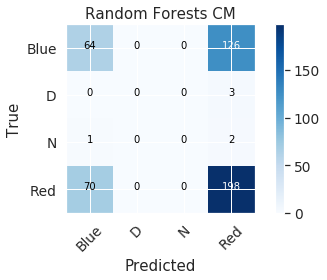

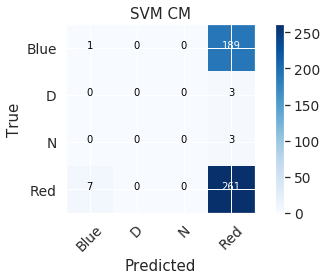

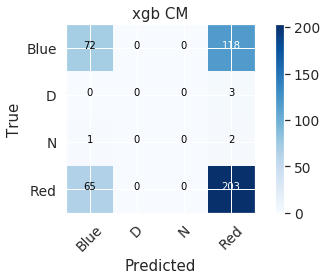

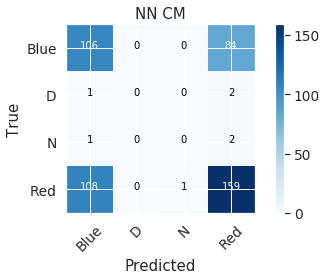

In [105]:
pprint_results(results_main_move_data)

## Normalize main move data

In [106]:
main_move_data_norm = main_move_data.copy()

In [107]:
main_move_data_norm['R__Prev'] = main_move_data_norm['R__Prev']+1
main_move_data_norm['B__Prev'] = main_move_data_norm['B__Prev']+1

In [108]:
main_move_data_norm['R__STRIKES'] = main_move_data_norm['R__STRIKES']/main_move_data_norm['R__Prev']
main_move_data_norm['R__Tip'] = main_move_data_norm['R__Tip']/main_move_data_norm['R__Prev']
main_move_data_norm['R__GRAPPLING'] = main_move_data_norm['R__GRAPPLING']/main_move_data_norm['R__Prev']
main_move_data_norm['B__STRIKES'] = main_move_data_norm['B__STRIKES']/main_move_data_norm['B__Prev']
main_move_data_norm['B__Tip'] = main_move_data_norm['B__Tip']/main_move_data_norm['B__Prev']
main_move_data_norm['B__GRAPPLING'] = main_move_data_norm['B__GRAPPLING']/main_move_data_norm['B__Prev']

In [109]:
main_move_data_norm.drop(['B__Prev','R__Prev'],axis=1,inplace=True)

In [110]:
main_move_data_norm.tail()

,B__Age,B__Height,R__Age,R__Height,winner,R__STRIKES,R__Tip,R__GRAPPLING,B__STRIKES,B__Tip,B__GRAPPLING
2313,34.0,172.0,39.0,172.0,0,435.166667,1586.000000,10.666667,825.000000,1564.750000,9.5
2314,31.0,177.0,34.0,180.0,3,1172.800000,1622.100000,3.200000,934.900000,1791.300000,4.3
2315,35.0,180.0,35.0,175.0,3,1296.857143,2233.285714,9.571429,706.166667,2095.666667,12.0
2316,37.0,170.0,23.0,167.0,3,350.500000,655.000000,1.000000,362.500000,1063.000000,2.5
2317,23.0,190.0,26.0,180.0,3,430.666667,999.555556,3.111111,0.000000,0.000000,0.0


In [111]:
results_main_move_data_norm = run_all(main_move_data_norm)

/home/hitkul/anaconda3/envs/ufc/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of Random Forests = 0.5517241379310345
Accuracy of SVM = 0.5668103448275862
Accuracy of xgb = 0.5732758620689655
Accuracy of NN = 0.5043103448275862


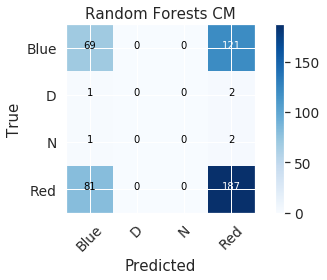

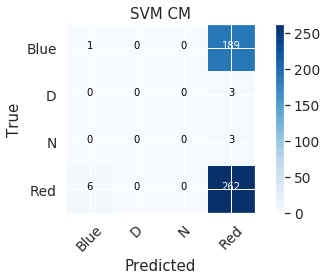

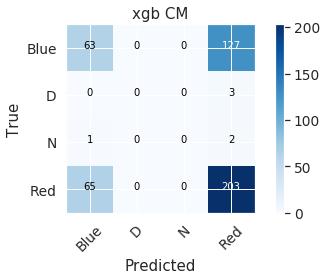

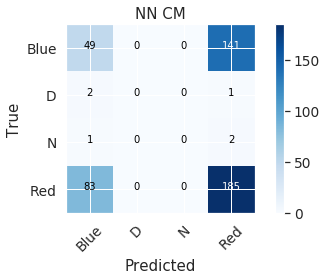

In [112]:
pprint_results(results_main_move_data_norm)

## Full data norm

In [113]:
main_move_full_norm = main_move_data.copy()

In [114]:
main_move_full_norm.drop(['B__Prev','R__Prev'],axis=1,inplace=True)

In [115]:
main_move_full_norm.tail()

,B__Age,B__Height,R__Age,R__Height,winner,R__STRIKES,R__Tip,R__GRAPPLING,B__STRIKES,B__Tip,B__GRAPPLING
2313,34.0,172.0,39.0,172.0,0,2611.0,9516.0,64.0,6600.0,12518.0,76.0
2314,31.0,177.0,34.0,180.0,3,11728.0,16221.0,32.0,9349.0,17913.0,43.0
2315,35.0,180.0,35.0,175.0,3,9078.0,15633.0,67.0,4237.0,12574.0,72.0
2316,37.0,170.0,23.0,167.0,3,701.0,1310.0,2.0,725.0,2126.0,5.0
2317,23.0,190.0,26.0,180.0,3,3876.0,8996.0,28.0,0.0,0.0,0.0


In [116]:
main_move_full_norm=((main_move_full_norm-main_move_full_norm.min())/(main_move_full_norm.max()-main_move_full_norm.min()))

In [117]:
main_move_full_norm['winner'] = main_move_data['winner']

In [118]:
main_move_full_norm.tail()

,B__Age,B__Height,R__Age,R__Height,winner,R__STRIKES,R__Tip,R__GRAPPLING,B__STRIKES,B__Tip,B__GRAPPLING
2313,0.708333,0.807512,0.812500,0.807512,0,0.106794,0.253692,0.463768,0.309481,0.359857,0.593750
2314,0.645833,0.830986,0.708333,0.845070,3,0.479692,0.432445,0.231884,0.438385,0.514949,0.335938
2315,0.729167,0.845070,0.729167,0.821596,3,0.371304,0.416769,0.485507,0.198678,0.361467,0.562500
2316,0.770833,0.798122,0.479167,0.784038,3,0.028672,0.034924,0.014493,0.033996,0.061117,0.039062
2317,0.479167,0.892019,0.541667,0.845070,3,0.158534,0.239829,0.202899,0.000000,0.000000,0.000000


In [119]:
results_main_move_full_norm = run_all(main_move_full_norm)

/home/hitkul/anaconda3/envs/ufc/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/hitkul/anaconda3/envs/ufc/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy of Random Forests = 0.5711206896551724
Accuracy of SVM = 0.5775862068965517
Accuracy of xgb = 0.5775862068965517
Accuracy of NN = 0.5905172413793104


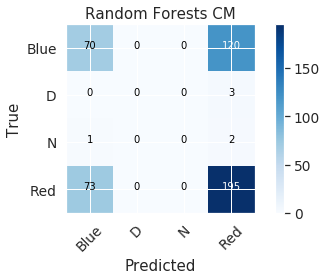

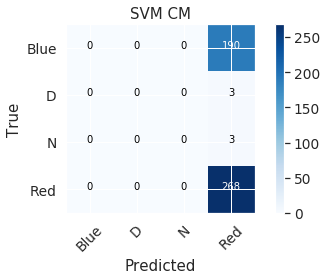

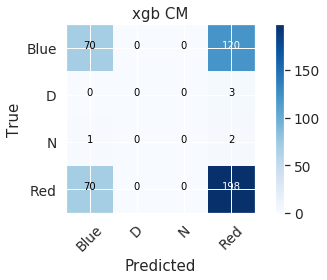

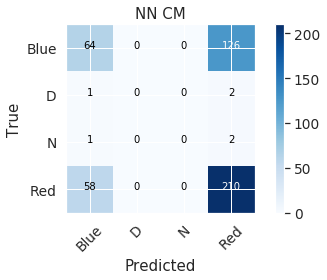

In [120]:
pprint_results(results_main_move_full_norm)

## Doing R/B

In [121]:
dropdata.tail()

,B__Prev,B__Streak,B__Age,B__Height,B__Round1_Grappling_Reversals_Landed,B__Round1_Grappling_Standups_Landed,B__Round1_Grappling_Submissions_Attempts,B__Round1_Grappling_Takedowns_Attempts,B__Round1_Grappling_Takedowns_Landed,B__Round1_Strikes_Body Significant Strikes_Attempts,...,R__Round5_TIP_Ground Control Time,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winner
2313,7,0,34.0,172.0,0.0,3.0,3.0,24.0,7.0,45.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2314,9,1,31.0,177.0,3.0,6.0,1.0,2.0,0.0,66.0,...,0.0,0.0,0.0,0.0,0.0,0.0,298.0,0.0,298.0,3
2315,5,3,35.0,180.0,0.0,1.0,1.0,25.0,12.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2316,1,0,37.0,170.0,0.0,0.0,0.0,3.0,1.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2317,0,0,23.0,190.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [122]:
dontchange = ['winner','B_Age','R_Age']
numeric_cols = [col for col in dropdata if col not in dontchange]
dropdata[numeric_cols] += 1 

In [123]:
newDF = dropdata.copy()
blue_cols = [col for col in dropdata.columns if 'B__' in col]
red_cols = [col for col in dropdata.columns if 'R__' in col]
for (blue,red) in zip(blue_cols,red_cols):
    newkey = ''.join(str(blue).split('_')[2:])
    dropdata[newkey] = dropdata[str(blue)]/dropdata[str(red)]
    del dropdata[str(blue)]
    del dropdata[str(red)]

In [124]:
dropdata.tail()

,B__Round5_TIP_Standing Time,winner,Prev,Streak,Age,Height,Round1GrapplingReversalsLanded,Round1GrapplingStandupsLanded,Round1GrapplingSubmissionsAttempts,Round1GrapplingTakedownsAttempts,...,Round5TIPControl Time,Round5TIPDistance Time,Round5TIPGround Control Time,Round5TIPGround Time,Round5TIPGuard Control Time,Round5TIPHalf Guard Control Time,Round5TIPMisc. Ground Control Time,Round5TIPMount Control Time,Round5TIPNeutral Time,Round5TIPSide Control Time
2313,1.0,0,1.333333,0.025000,0.202312,173.0,0.333333,4.000000,0.285714,3.125,...,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.000000
2314,119.0,3,1.000000,0.057143,0.176796,178.0,0.800000,1.166667,0.400000,1.000,...,0.003344,72.0,1.0,183.0,1.0,1.0,1.0,0.003344,79.0,0.003344
2315,1.0,3,0.857143,0.111111,0.204545,90.5,0.250000,2.000000,0.181818,5.200,...,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.000000
2316,1.0,3,1.000000,0.041667,0.226190,171.0,1.000000,1.000000,1.000000,4.000,...,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.000000
2317,1.0,3,0.111111,0.037037,0.132597,191.0,0.333333,0.500000,0.142857,0.200,...,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.000000


In [125]:
results_r_d_b = run_all(dropdata)

/home/hitkul/anaconda3/envs/ufc/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of Random Forests = 0.5732758620689655
Accuracy of SVM = 0.5668103448275862
Accuracy of xgb = 0.5732758620689655
Accuracy of NN = 0.5129310344827587


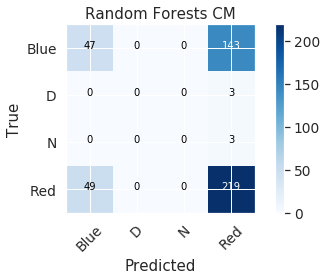

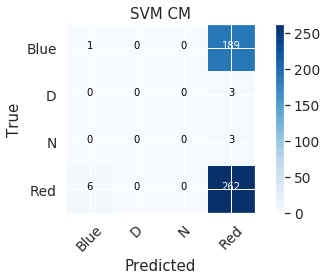

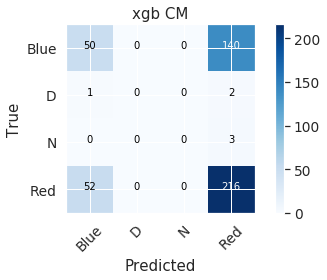

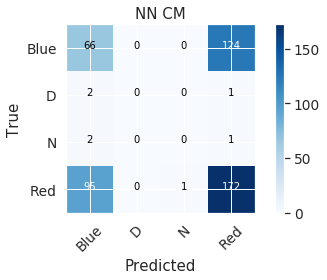

In [126]:
pprint_results(results_r_d_b)

## Swap and append data

In [212]:
swap_data = threerounds_data

In [213]:
# swap_data.drop(['B__Streak'],axis=1,inplace=True)

In [214]:
def swap_data_frame(swap_data):
    cols = list(swap_data.columns)
    b_cols = [i for i in cols if i[0]=='B']
    for b_c in b_cols:
        r_c = 'R'+b_c[1:]
        b_index = cols.index(b_c)
        r_index = cols.index(r_c)
        cols[b_index], cols[r_index] = cols[r_index], cols[b_index]
    swap_data.columns = cols
    return swap_data

In [215]:
swap_data.tail()

,R__Prev,R__Age,R__Height,R__Round1_Grappling_Reversals_Landed,R__Round1_Grappling_Standups_Landed,R__Round1_Grappling_Submissions_Attempts,R__Round1_Grappling_Takedowns_Attempts,R__Round1_Grappling_Takedowns_Landed,R__Round1_Strikes_Body Significant Strikes_Attempts,R__Round1_Strikes_Body Significant Strikes_Landed,...,B__Round3_TIP_Ground Control Time,B__Round3_TIP_Ground Time,B__Round3_TIP_Guard Control Time,B__Round3_TIP_Half Guard Control Time,B__Round3_TIP_Misc. Ground Control Time,B__Round3_TIP_Mount Control Time,B__Round3_TIP_Neutral Time,B__Round3_TIP_Side Control Time,B__Round3_TIP_Standing Time,winner
2313,5,39.0,172.0,0.0,2.0,0.0,13.0,7.0,17.0,13.0,...,184.0,262.0,28.0,0.0,0.0,156.0,502.0,0.0,652.0,0
2314,9,34.0,180.0,0.0,4.0,5.0,4.0,2.0,54.0,32.0,...,43.0,389.0,0.0,0.0,39.0,4.0,704.0,0.0,753.0,3
2315,6,35.0,175.0,1.0,3.0,0.0,10.0,4.0,54.0,41.0,...,485.0,709.0,38.0,214.0,149.0,40.0,661.0,0.0,943.0,3
2316,1,23.0,167.0,0.0,0.0,0.0,0.0,0.0,9.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2317,8,26.0,180.0,0.0,2.0,1.0,6.0,4.0,19.0,11.0,...,181.0,293.0,0.0,0.0,7.0,174.0,158.0,0.0,310.0,3


In [216]:
swap_data = swap_data_frame(swap_data)

In [217]:
swap_data.tail()

,B__Prev,B__Age,B__Height,B__Round1_Grappling_Reversals_Landed,B__Round1_Grappling_Standups_Landed,B__Round1_Grappling_Submissions_Attempts,B__Round1_Grappling_Takedowns_Attempts,B__Round1_Grappling_Takedowns_Landed,B__Round1_Strikes_Body Significant Strikes_Attempts,B__Round1_Strikes_Body Significant Strikes_Landed,...,R__Round3_TIP_Ground Control Time,R__Round3_TIP_Ground Time,R__Round3_TIP_Guard Control Time,R__Round3_TIP_Half Guard Control Time,R__Round3_TIP_Misc. Ground Control Time,R__Round3_TIP_Mount Control Time,R__Round3_TIP_Neutral Time,R__Round3_TIP_Side Control Time,R__Round3_TIP_Standing Time,winner
2313,5,39.0,172.0,0.0,2.0,0.0,13.0,7.0,17.0,13.0,...,184.0,262.0,28.0,0.0,0.0,156.0,502.0,0.0,652.0,0
2314,9,34.0,180.0,0.0,4.0,5.0,4.0,2.0,54.0,32.0,...,43.0,389.0,0.0,0.0,39.0,4.0,704.0,0.0,753.0,3
2315,6,35.0,175.0,1.0,3.0,0.0,10.0,4.0,54.0,41.0,...,485.0,709.0,38.0,214.0,149.0,40.0,661.0,0.0,943.0,3
2316,1,23.0,167.0,0.0,0.0,0.0,0.0,0.0,9.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2317,8,26.0,180.0,0.0,2.0,1.0,6.0,4.0,19.0,11.0,...,181.0,293.0,0.0,0.0,7.0,174.0,158.0,0.0,310.0,3


In [218]:
results_swap = run_all(swap_data)

/home/hitkul/anaconda3/envs/ufc/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of Random Forests = 0.5366379310344828
Accuracy of SVM = 0.5711206896551724
Accuracy of xgb = 0.6142241379310345
Accuracy of NN = 0.5495689655172413


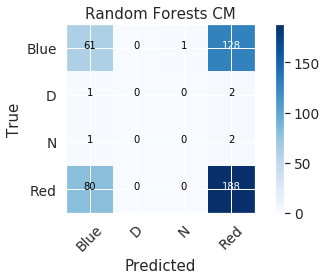

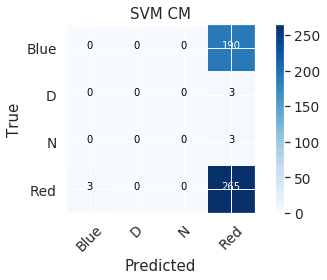

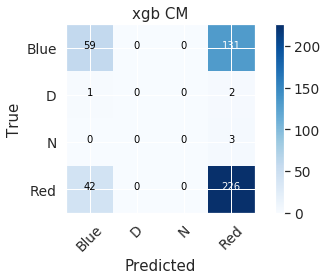

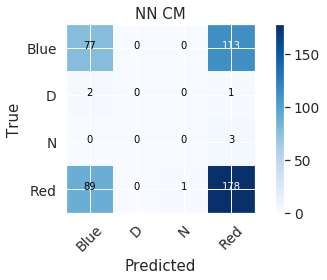

In [219]:
pprint_results(results_swap)

In [220]:
frames = [threerounds_data,swap_data]

In [221]:
concat_data = pd.concat(frames)

In [223]:
results_concat = run_all(concat_data)

/home/hitkul/anaconda3/envs/ufc/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
pprint_results(results_concat)